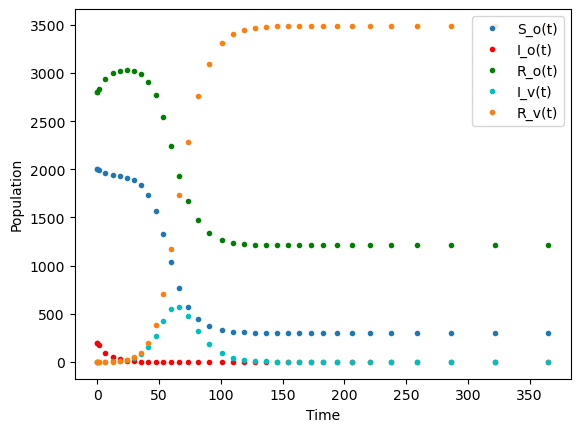

In [1]:
import numpy as np
import matplotlib.pyplot as plt #Matplotlib is used to generate our plots
from scipy.integrate import solve_ivp #We will use solve_ivp to numerically solve the system of differential equations. 

# Define the system of ODEs

def sirsys2(t, y): #y is a vector whose components are Susceptibles, Infected, Recovered respectively
    So, Io, Ro,Iv,Rv = y
    dSo_dt = -a * So * Io-c*So*Iv
    dIo_dt = a * So * Io - b * Io
    dRo_dt = b * Io-d*Ro*Iv
    dIv_dt = c * So * Iv +d*Ro*Iv- bv * Iv
    dRv_dt = bv * Iv
    return [dSo_dt, dIo_dt, dRo_dt, dIv_dt, dRv_dt]

# Time range and initial conditions
a = 0.00002
b = 0.15
c=0.00008
d=0.00004
bv=0.15
t_span = (0, 365)
y0=[2000,199,2800,1,0]

# Specify error tolerences, that is how accurately our Initial Value Problem will be solved numerically 
rtol = 1e-4
atol = 1e-4

# Solve the system
solv = solve_ivp(sirsys2, t_span, y0, method='RK45', rtol=rtol, atol=atol)



# Plotting the results
plt.plot(solv.t, solv.y[0], '.', label='S_o(t)')
plt.plot(solv.t, solv.y[1], '.', color='r', label='I_o(t)')
plt.plot(solv.t, solv.y[2], '.', color='g', label='R_o(t)')
plt.plot(solv.t, solv.y[3], '.', color='c', label='I_v(t)')
plt.plot(solv.t, solv.y[4], '.', label='R_v(t)')


plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

